In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

df = pd.read_csv("email_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [2]:
df.shape

(5171, 4)

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [4]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5171, 4)


In [5]:
# to show the number of missing data
print(df.isnull().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


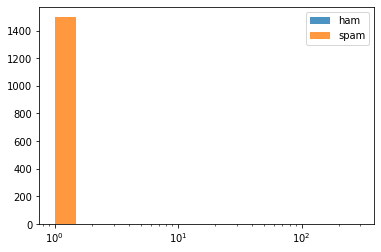

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['label_num'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['label_num'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [7]:
# download the stopwords package
#nltk.download("stopwords")

In [8]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['text'].head().apply(process)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

In [9]:
x = df['text']  
y = df['label_num']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(stop_words="english").fit_transform(x)

In [11]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, y, test_size=0.2, random_state=0)
print(message.shape)
print("----------------")
print(xtrain.shape)
print("----------------")
print(ytrain.shape)

(5171, 50140)
----------------
(4136, 50140)
----------------
(4136,)


In [12]:
#ALGORITHM-1 : MULTI-NAIVE BAYES CLASSIFIER
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB().fit(xtrain, ytrain)

In [13]:
#print the predictions
pred1 = mb.predict(xtest)
print(pred1)
#print the actual values
pred1_y=ytest.values
print(pred1_y)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [14]:
# Evaluating the model on the testing data set--->MB Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(ytest, pred1))
print()
cm1=confusion_matrix(ytest, pred1)
print("Confusion Matrix 1: \n", cm1)
ac1=accuracy_score(ytest, pred1)*100
print("Accuracy 1: \n",ac1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       732
           1       0.96      0.95      0.95       303

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035


Confusion Matrix 1: 
 [[719  13]
 [ 16 287]]
Accuracy 1: 
 97.19806763285024


In [15]:
#ALGORITHM-2 : XGBOOST CLASSIFIER
# create and train the XGB Classifier
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                   learning_rate = 0.1,max_depth = 5, 
                   alpha = 10, n_estimators = 10).fit(xtrain,ytrain)

In [16]:
#print the predictions
pred2 = xgb.predict(xtest)
print(pred2)
#print the actual values
pred2_y=ytest.values
print(pred2_y)

[0.3155769  0.19970049 0.25314766 ... 0.26883796 0.51183486 0.16608733]
[0 0 0 ... 0 1 0]


In [17]:
# Evaluating the model on the testing data set--->XG Boost Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm2 = confusion_matrix(ytest, pred2 > 0.5, labels=[0, 1])
print(classification_report(ytest, (pred2>0.5)))
print()
print("Confusion Matrix 2: \n", cm2)
ac2 = accuracy_score(ytest, (pred2>0.5))*100
print("Accuracy 2: \n",ac2)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       732
           1       0.82      0.96      0.88       303

    accuracy                           0.93      1035
   macro avg       0.90      0.94      0.92      1035
weighted avg       0.93      0.93      0.93      1035


Confusion Matrix 2: 
 [[669  63]
 [ 13 290]]
Accuracy 2: 
 92.65700483091788


In [18]:
#ALGORITHM-3 : K-NEAREST NEIGHBOURS CLASSIFIER
# create and train the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier().fit(xtrain,ytrain)

In [19]:
#print the predictions
pred3=kNN.predict(xtest)
print(pred3)
#print the actual values
pred3_y=ytest.values
print(pred3_y)
# Evaluating the model on the testing data set--->KNN Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm3 = confusion_matrix(ytest, pred3 > 0.5, labels=[0, 1])
print(classification_report(ytest, (pred3>0.5)))
print()
print("Confusion Matrix 3: \n", cm3)
ac3 = accuracy_score(ytest, (pred3>0.5))*100
print("Accuracy 2: \n",ac3)

[1 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       732
           1       0.60      0.96      0.74       303

    accuracy                           0.80      1035
   macro avg       0.79      0.85      0.79      1035
weighted avg       0.87      0.80      0.81      1035


Confusion Matrix 3: 
 [[541 191]
 [ 11 292]]
Accuracy 2: 
 80.4830917874396


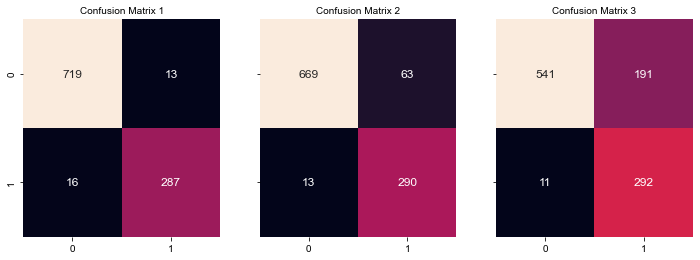

In [20]:
#Illustration and comparision between confusion matrices of all Classifiers
import seaborn as sn
import matplotlib.pyplot as mp
fig, axn = mp.subplots(1,3, sharex=True, sharey=True,figsize=(12,4))
sn.set(font_scale=1)
df1 = pd.DataFrame(cm1, range(2), range(2))
df2 = pd.DataFrame(cm2, range(2), range(2))
df3 = pd.DataFrame(cm3, range(2), range(2))
cm_list=[df1,df2,df3]
label=["Confusion Matrix 1","Confusion Matrix 2","Confusion Matrix 3"]
for i, ax in enumerate(axn.flat):
    sn.heatmap(cm_list[i],annot=True,ax=ax,cbar=i==4,fmt='d')
    ax.set_title(label[i],fontsize=10)

In [23]:
labels=["Multi-NB","XGB","KNN"]
values=[ac1,ac2,ac3]
AccuracyDF= pd.DataFrame({'Name': labels, 'Score': values})
print(AccuracyDF)

       Name      Score
0  Multi-NB  97.198068
1       XGB  92.657005
2       KNN  80.483092


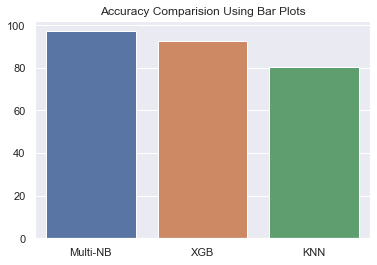

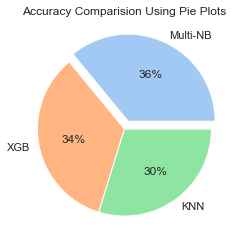

In [24]:
#Comparision between Accuracy of all Classifiers using Barchart and Piechart
sn.barplot(x=labels,y=values).set_title("Accuracy Comparision Using Bar Plots")
mp.show()
colors = sn.color_palette('pastel')
explode=[0.1,0,0]
mp.pie(values, labels=labels,colors = colors,explode=explode,autopct = '%0.0f%%')
mp.title("Accuracy Comparision Using Pie Plots")
mp.show()